<a href="https://colab.research.google.com/github/hakim733/Banking-ML/blob/main/Banking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Marketing

### Problem Statment

The data set is based off the direct marketing campaigns of a  banking institution. These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not.

**The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).**

The dataset contains 21 columns including the output (y). I am going to discard the output column and use the remaining columns to find the most relatable independent variables (x) that will be able to predict if a customer will subscribe to a bank deposit or not.

### Project Approach

- Data exploration

- Feature engineering

- Building training/validation/test samples

- Model selection

- Model evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)

In [ ]:
missing_values = ['missing','N\\a','N\a','Na','Null','-', np.nan]
df = pd.read_csv(r'C:\Users\LENOVO\Downloads\bank-additional-full.csv', sep = ';', na_values = missing_values)

In [ ]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#### we are adding an extra column here in which we are converting our output target to numerical values i.e. yes = 1 and no = 0

In [ ]:
df['output_label'] = df['y'].replace({'yes': 1, 'no':0})

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,output_label
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,output_label
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0


In [ ]:
round(df['output_label'].value_counts(normalize = True), 3)

0    0.887
1    0.113
Name: output_label, dtype: float64

In [ ]:
#### 1 which is yes occured only 11.3% times

### now we are getting the unique values of each column

In [ ]:
for a in list(df.columns):
    n = df[a].unique()
    if len(n) < 30:
        print (a)
        print (n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values' )

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

- we are discarding the duration column, it is the duration of the call, it highly affects the output ( e.g if duration = 0 then y = no), yet the duration of the call is not known before the call, and after the call if the duration is 0 then obviously y i no. That's why it should not be included in realistic predictive modeling and should ony be used as a benchmark.

# data visualization

## numerical features

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'output_label'],
      dtype='object')

In [ ]:
cols_num = ['age', 'campaign',
            'pdays', 'previous' , 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',  'nr.employed', 'euribor3m']

In [ ]:
df[cols_num].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,euribor3m
0,56,1,999,0,1.1,93.994,-36.4,5191.0,4.857
1,57,1,999,0,1.1,93.994,-36.4,5191.0,4.857
2,37,1,999,0,1.1,93.994,-36.4,5191.0,4.857
3,40,1,999,0,1.1,93.994,-36.4,5191.0,4.857
4,56,1,999,0,1.1,93.994,-36.4,5191.0,4.857


Text(0, 0.5, 'count')

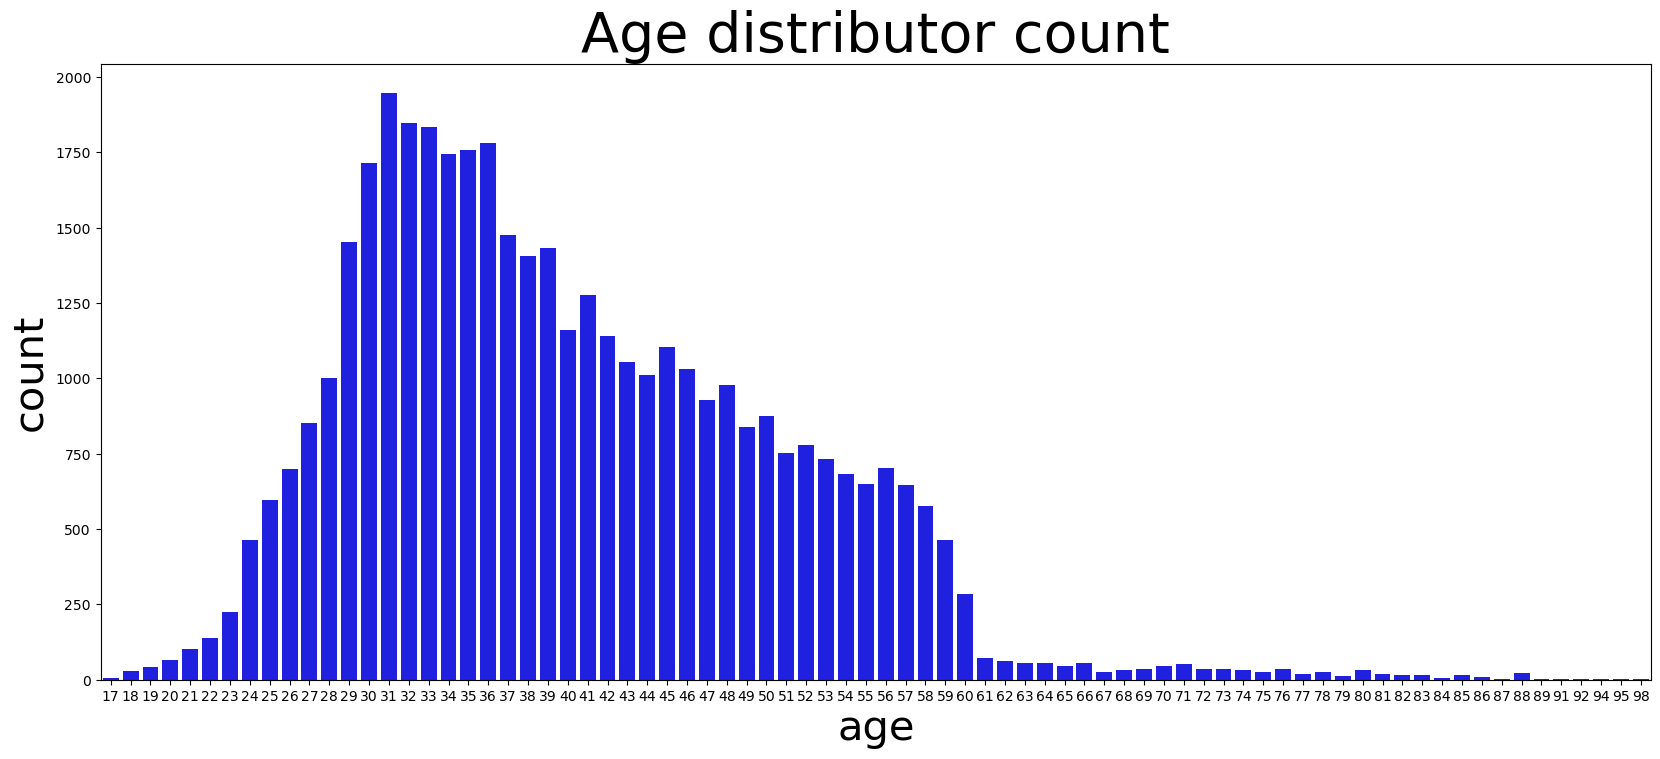

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'age', data = df, color = 'blue')
plt.title('Age distributor count', fontsize = 40)
plt.xlabel('age', fontsize = 30)
plt.ylabel('count', fontsize = 30)

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3904\1598641700.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols_num]['age'], ax = ax2)


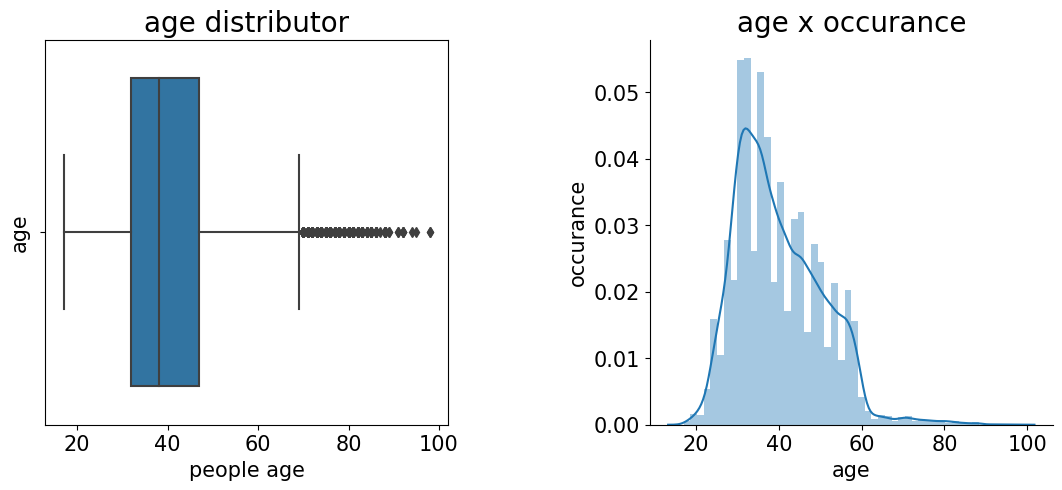

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2, figsize = (13,5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('people age', fontsize = 15)
ax1.set_ylabel('age', fontsize = 15)
ax1.set_title('age distributor', fontsize = 20)
ax1.tick_params(labelsize = 15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('age', fontsize = 15)
ax2.set_ylabel('occurance', fontsize = 15)
ax2.set_title('age x occurance', fontsize = 20)
ax2.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)
#plt.tight_layout()

Text(0, 0.5, 'count')

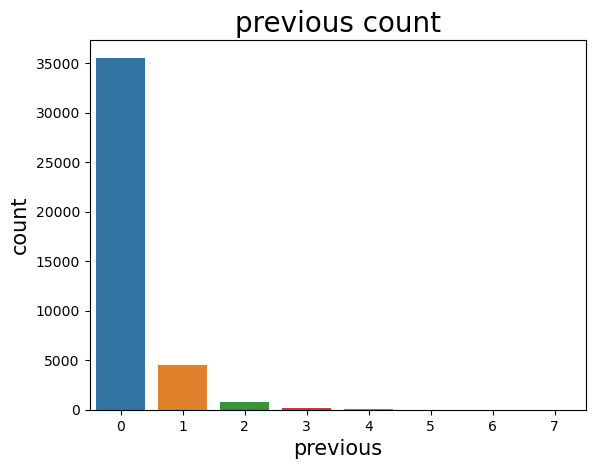

In [ ]:
sns.countplot(x = 'previous', data = df[cols_num])
plt.title('previous count', fontsize = 20)
plt.xlabel('previous', fontsize = 15)
plt.ylabel('count', fontsize = 15)

Text(0, 0.5, 'count')

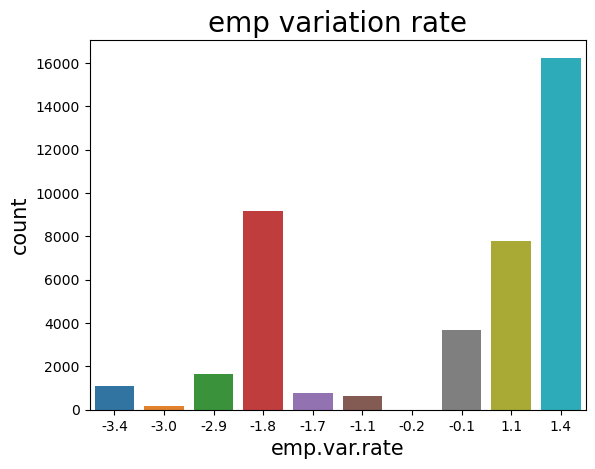

In [ ]:
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
plt.title('emp variation rate', fontsize = 20)
plt.xlabel('emp.var.rate', fontsize = 15)
plt.ylabel('count', fontsize = 15)

## categorical features

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'output_label'],
      dtype='object')

In [ ]:
cols_cat =['job', 'marital', 'education',  'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome' ]

## one hot encoding

In [ ]:
col_new_cat = pd.get_dummies(df[cols_cat], drop_first = False)
col_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df[cols_cat]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


Text(0, 0.5, 'count')

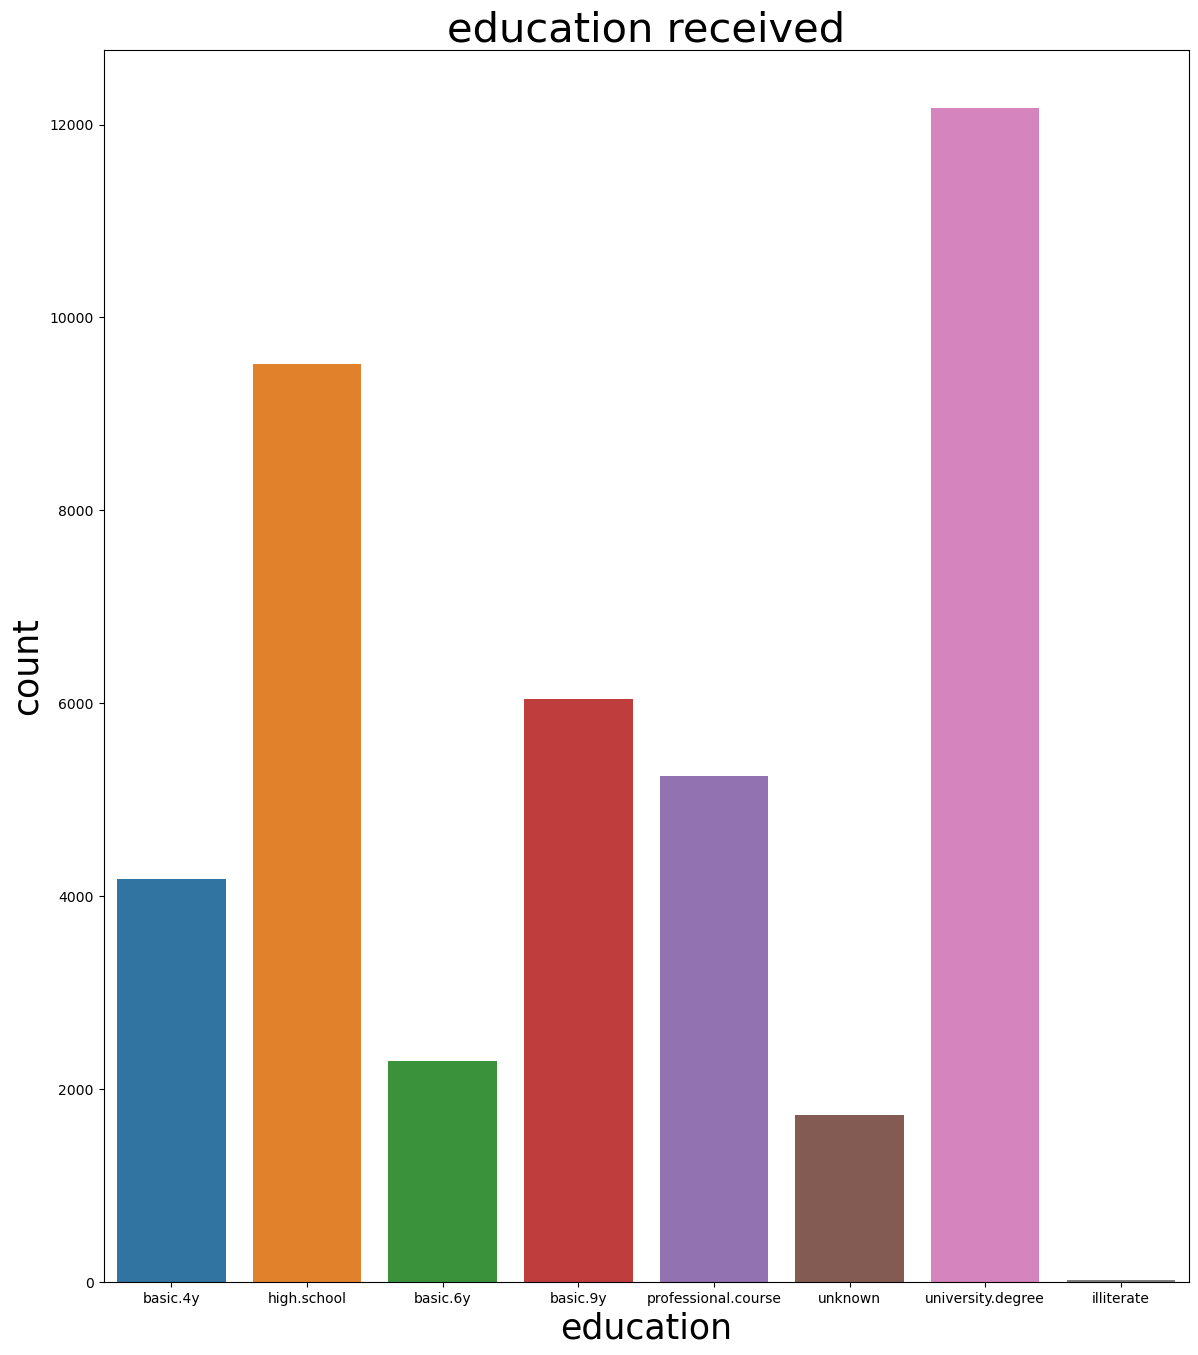

In [ ]:
plt.figure(figsize = (14,16))
sns.countplot(x = 'education', data = df)
plt.title('education received', fontsize = 30)
plt.xlabel('education', fontsize = 25)
plt.ylabel('count', fontsize = 25)

Text(0, 0.5, 'count')

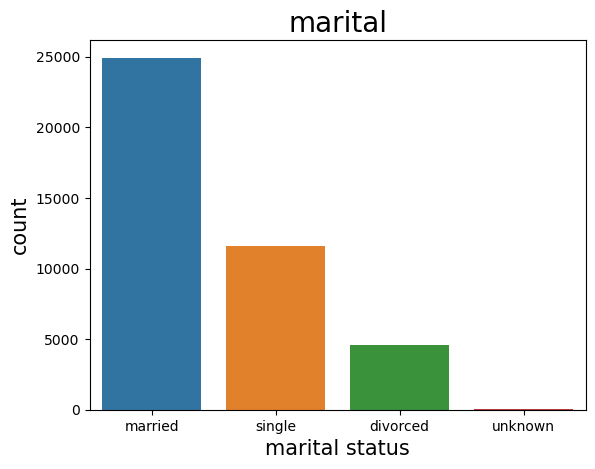

In [ ]:
#plt.figure(figsize = (14,16))
sns.countplot(x = 'marital', data = df)
plt.title('marital', fontsize = 20)
plt.xlabel('marital status', fontsize = 15)
plt.ylabel('count', fontsize = 15)

Text(0, 0.5, 'count')

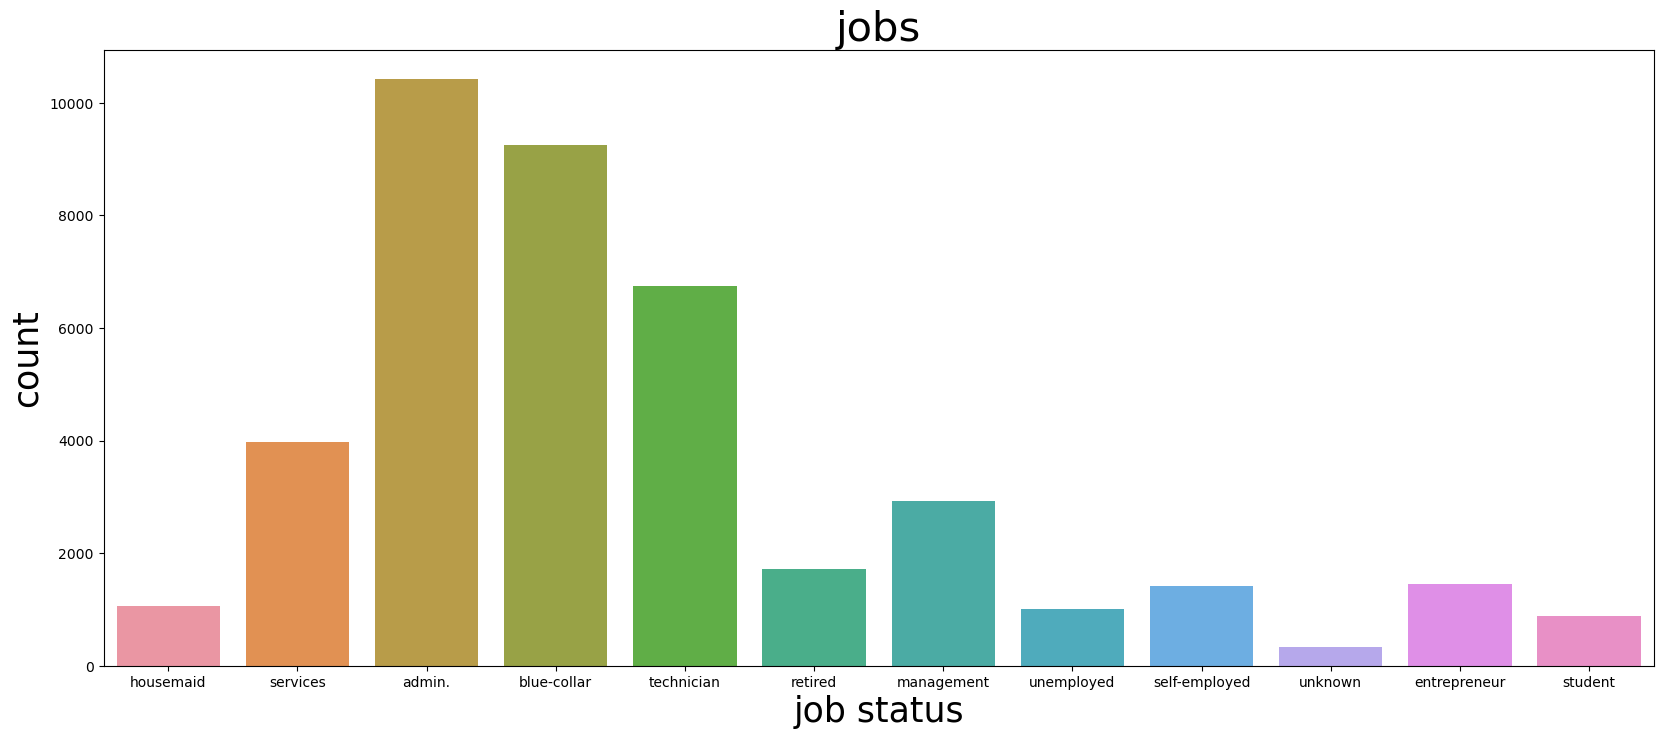

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'job', data = df)
plt.title('jobs', fontsize = 30)
plt.xlabel('job status', fontsize = 25)
plt.ylabel('count', fontsize = 25)

Text(0, 0.5, 'count')

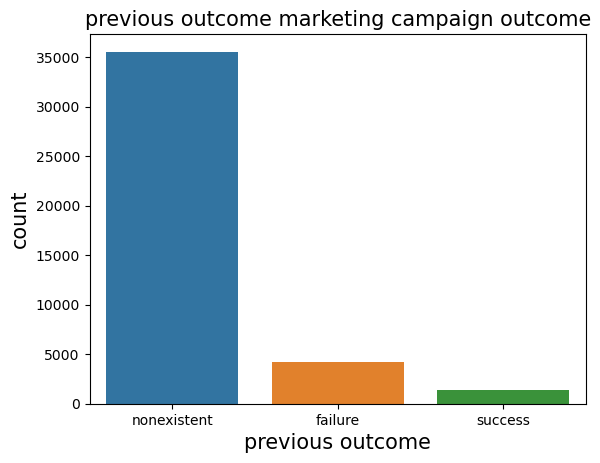

In [ ]:
#plt.figure(figsize = (14,16))
sns.countplot(x = 'poutcome', data = df)
plt.title('previous outcome marketing campaign outcome', fontsize = 15)
plt.xlabel('previous outcome', fontsize = 15)
plt.ylabel('count', fontsize = 15)

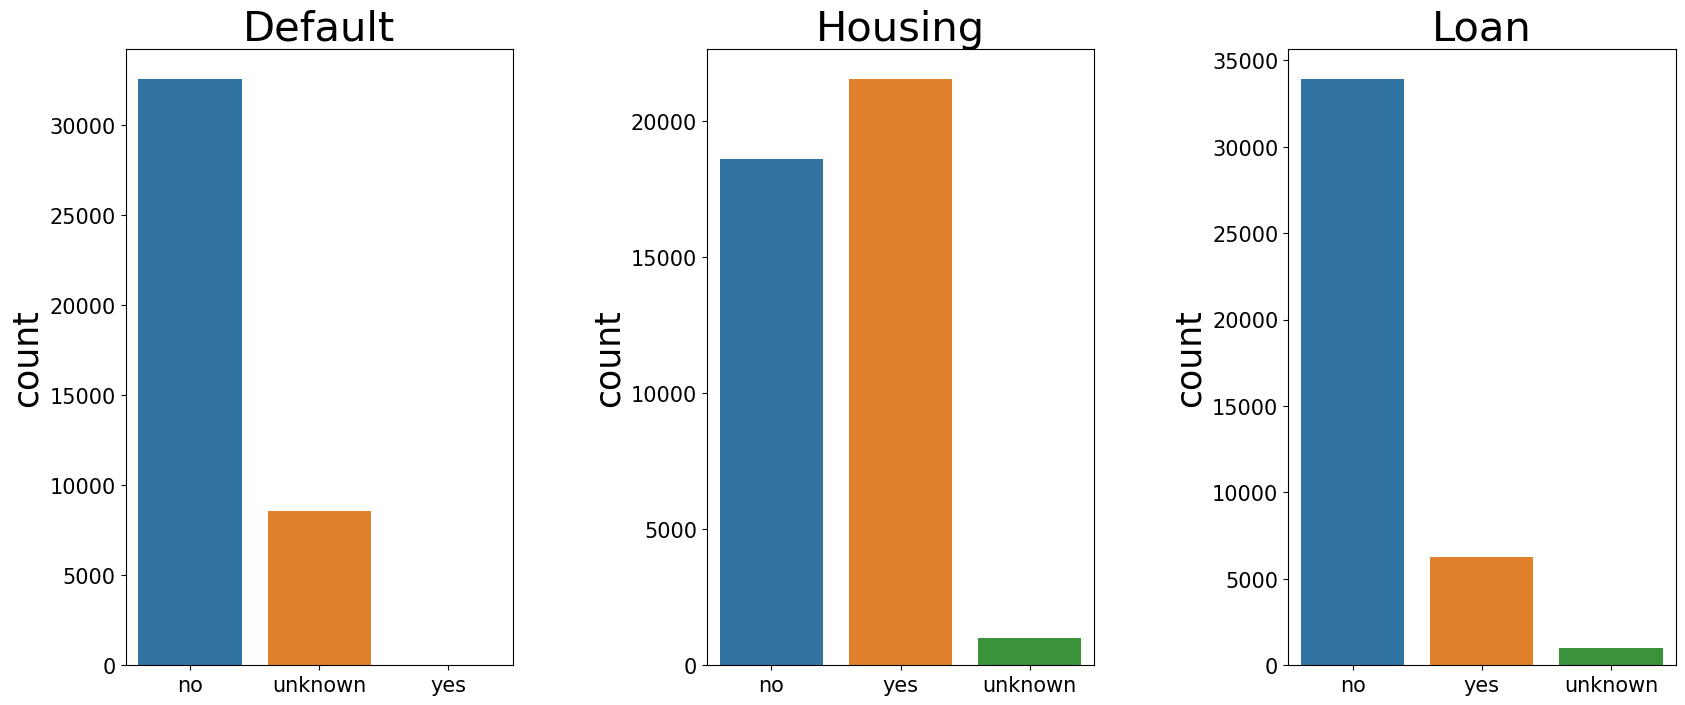

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1 , ncols = 3, figsize = (20,8))

sns.countplot(x = 'default', data = df, ax = ax1)
ax1.set_title('Default', fontsize = 30)
ax1.set_xlabel('', fontsize = 25)
ax1.set_ylabel('count', fontsize = 25)
ax1.tick_params(labelsize = 15)

sns.countplot(x = 'housing', data = df, ax = ax2)
ax2.set_title('Housing', fontsize = 30)
ax2.set_xlabel('', fontsize = 25)
ax2.set_ylabel('count', fontsize = 25)
ax2.tick_params(labelsize = 15)

sns.countplot(x = 'loan', data = df, ax = ax3)
ax3.set_title('Loan', fontsize = 30)
ax3.set_xlabel('', fontsize = 25)
ax3.set_ylabel('count', fontsize = 25)
ax3.tick_params(labelsize = 15)

plt.subplots_adjust(wspace = 0.5)

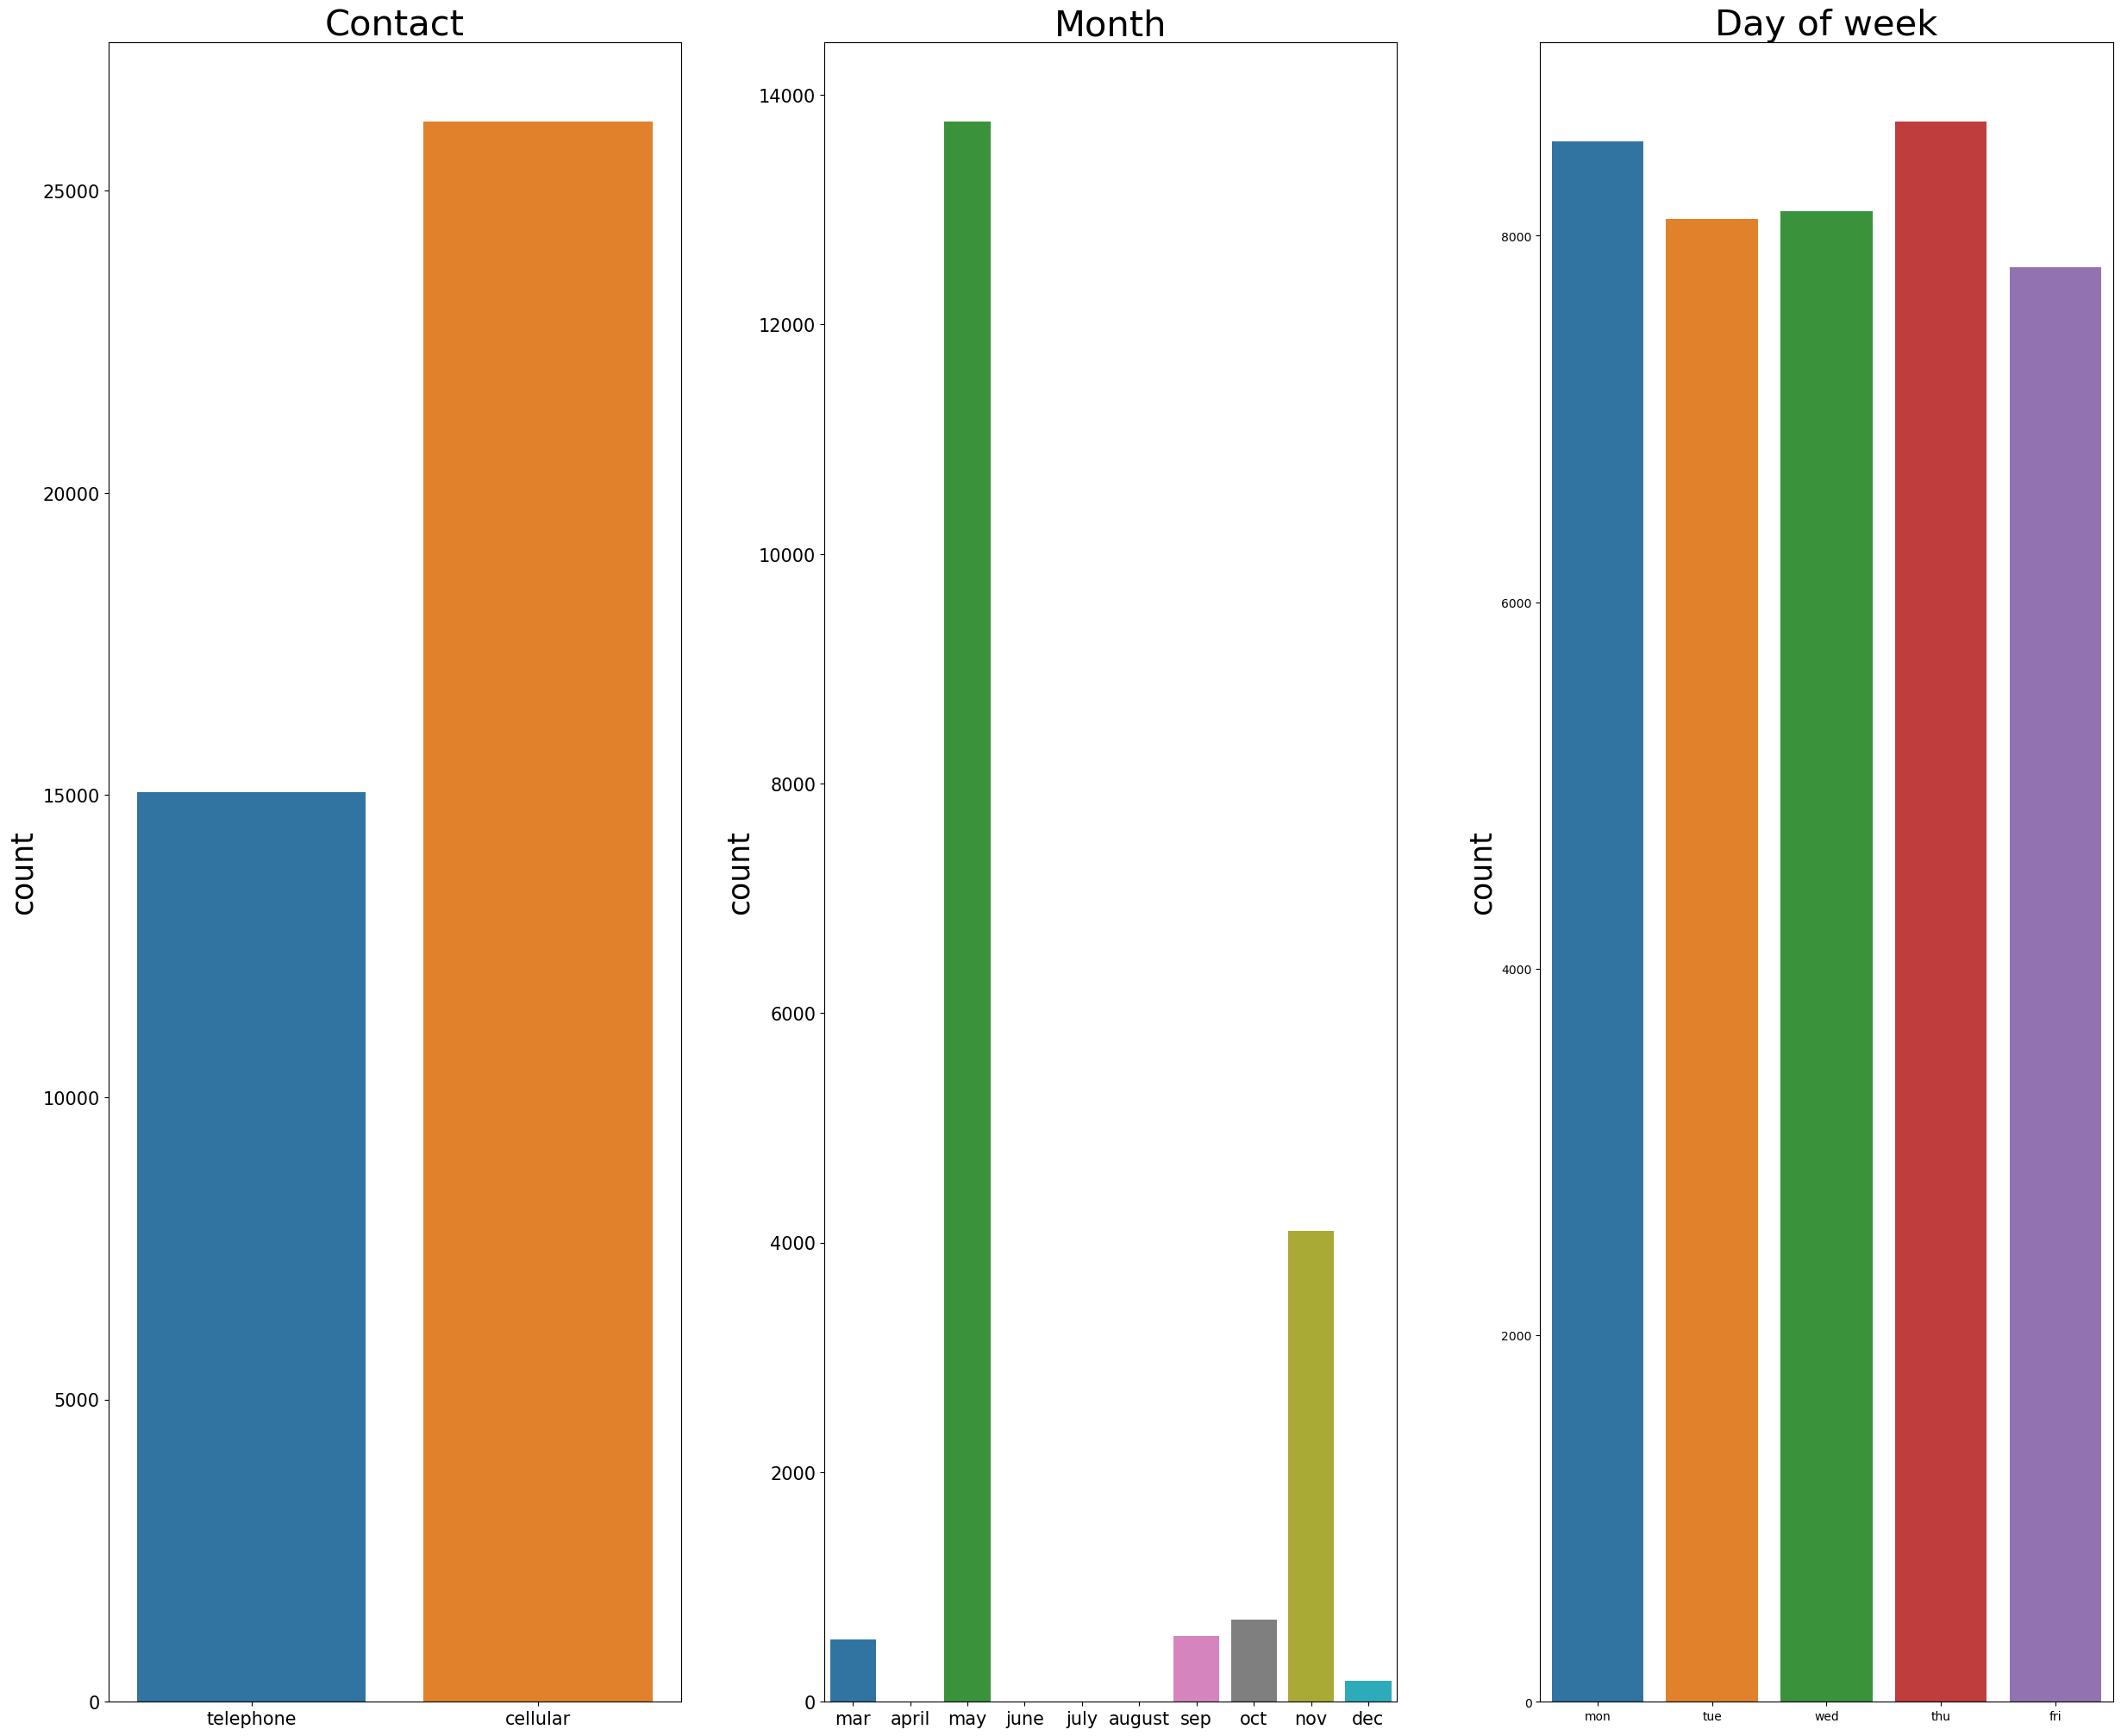

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1 , ncols = 3, figsize = (30,25))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_title('Contact', fontsize = 30)
ax1.set_xlabel('', fontsize = 25)
ax1.set_ylabel('count', fontsize = 25)
ax1.tick_params(labelsize = 15)

sns.countplot(x = 'month', data = df, ax = ax2, order = ['mar','april','may','june','july','august','sep','oct','nov','dec'])
ax2.set_title('Month', fontsize = 30)
ax2.set_xlabel('', fontsize = 25)
ax2.set_ylabel('count', fontsize = 25)
ax2.tick_params(labelsize = 15)

sns.countplot(x = 'day_of_week', data = df, ax = ax3)
ax3.set_title('Day of week', fontsize = 30)
ax3.set_xlabel('', fontsize = 25)
ax3.set_ylabel('count', fontsize = 25)
ax3.tick_params(labelsize = 10)

plt.subplots_adjust(wspace = 0.25)

In [ ]:
df = pd.concat([df, col_new_cat], axis =1)

In [ ]:
cols_all_cat = list(col_new_cat.columns)

In [ ]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df[cols_num + cols_all_cat].isnull().sum().sort_values(ascending = False)

age                      0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [ ]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['output_label']]

In [ ]:
df_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,output_label
0,56,1,999,0,1.1,93.994,-36.4,5191.0,4.857,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,5191.0,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,5191.0,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,5191.0,4.857,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,5191.0,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,4963.6,1.028,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,-1.1,94.767,-50.8,4963.6,1.028,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,4963.6,1.028,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,4963.6,1.028,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


##  building training validation and test set

In [ ]:
# 70% of data for training purpose
# 15% of data for validation
# 15% of data for test

In [ ]:
# shuffle the sample

df_data = df_data.sample(n=len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [ ]:
df_valid_test = df_data.sample(frac = 0.30, random_state = 42)

In [ ]:
df_test = df_valid_test.sample(frac = 0.5, random_state= 42)
df_valid = df_valid_test.drop(df_test.index)

In [ ]:
df_valid_test.shape

(12356, 63)

In [ ]:
df_data.shape

(41188, 63)

In [ ]:
df_test.shape

(6178, 63)

In [ ]:
df_valid.shape

(6178, 63)

In [ ]:
df_train_all = df_data.drop(df_valid_test.index)

In [ ]:
df_train_all.shape

(28832, 63)

### check the prevalence of each

In [ ]:
print(df_train_all['output_label'].value_counts(normalize = True))
print(df_valid['output_label'].value_counts(normalize = True))
print(df_test['output_label'].value_counts(normalize = True))



0    0.887764
1    0.112236
Name: output_label, dtype: float64
0    0.886857
1    0.113143
Name: output_label, dtype: float64
0    0.885885
1    0.114115
Name: output_label, dtype: float64


## Splitting the Data into Positive and Negative Classes

In [ ]:
pos = df_train_all['output_label']==1
neg = df_train_all['output_label']==0

In [ ]:
positive = df_train_all.loc[pos]
negative = df_train_all.loc[neg]

In [ ]:
positive.shape

(3236, 63)

In [ ]:
negative.shape

(25596, 63)

In [ ]:
df_train = pd.concat([positive,negative.sample(n = len(positive), random_state = 42)], axis = 0)

In [ ]:
df_train.shape

(6472, 63)

## Shuffling the Order of Training Samples

In [ ]:
df_train = df_train.sample(n = len(df_train), random_state = 42)
df_train = df_train.reset_index(drop = True)

In [ ]:
df_train['output_label'].value_counts(normalize = True)

1    0.5
0    0.5
Name: output_label, dtype: float64

## Doing the same with validation and testing data

In [ ]:
pos = df_valid['output_label']== 1
neg = df_valid['output_label']== 0

positive = df_valid.loc[pos]
negative = df_valid.loc[neg]

df_valid = pd.concat([positive,negative.sample(n = len(positive), random_state = 42)], axis = 0)

df_valid = df_valid.sample(n = len(df_valid), random_state = 42)
df_valid = df_valid.reset_index(drop = True)

In [ ]:
df_valid.shape

(1398, 63)

In [ ]:
df_valid['output_label'].value_counts(normalize = True)

1    0.5
0    0.5
Name: output_label, dtype: float64

In [ ]:
pos = df_test['output_label']== 1
neg = df_test['output_label']== 0

positive = df_test.loc[pos]
negative = df_test.loc[neg]

df_test = pd.concat([positive,negative.sample(n = len(positive), random_state = 42)], axis = 0)

df_test = df_test.sample(n = len(df_test), random_state = 42)
df_test = df_test.reset_index(drop = True)

In [ ]:
df_test.shape

(1410, 63)

In [ ]:
df_test['output_label'].value_counts(normalize = True)

1    0.5
0    0.5
Name: output_label, dtype: float64

### now we will be dividing our dataset into IV and DV

In [ ]:
x_train = df_train[cols_input].values
x_train_all = df_train_all[cols_input].values
x_valid = df_valid[cols_input].values

y_train = df_train['output_label'].values
y_valid = df_valid['output_label'].values

In [ ]:
x_train_all.shape

(28832, 62)

In [ ]:
x_train.shape

(6472, 62)

In [ ]:
x_valid.shape

(1398, 62)

In [ ]:
y_train.shape

(6472,)

In [ ]:
y_valid.shape

(1398,)

### now we will scale our datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()

In [ ]:
scaler.fit(x_train_all)

StandardScaler()

In [ ]:
# transform our data matrices

In [ ]:
x_train_tf = scaler.transform(x_train)
x_valid_tf = scaler.transform(x_valid)

In [ ]:
x_valid_tf

array([[-0.67243067, -0.56550716,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-2.20425393, -0.20123767,  0.19574704, ...,  2.95310619,
        -2.51610627, -0.1862875 ],
       [-0.38521381, -0.56550716,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       ...,
       [-1.05538648, -0.56550716,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [ 0.18921991, -0.20123767,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [ 0.57217573, -0.20123767,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ]])

In [ ]:
x_train_tf

array([[ 1.43382631,  1.6201098 ,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [ 0.95513154, -0.56550716,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [ 0.18921991, -0.56550716,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       ...,
       [ 0.28495887,  0.16303182,  0.19574704, ..., -0.3386265 ,
         0.39743949, -0.1862875 ],
       [-0.57669172,  0.16303182,  0.19574704, ...,  2.95310619,
        -2.51610627, -0.1862875 ],
       [-1.34260335, -0.56550716,  0.19574704, ...,  2.95310619,
        -2.51610627, -0.1862875 ]])

## Model Selection

In [ ]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):

    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)

    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    #return auc, accuracy, recall, precision, specificity, f1

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
y_train_preds = knn.predict_proba(x_train_tf)[:,1]
y_valid_preds = knn.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('KNN')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

KNN
Training:
AUC:0.797
accuracy:0.734
recall:0.604
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.694
 
Validation:
AUC:0.779
accuracy:0.741
recall:0.601
precision:0.835
specificity:0.878
prevalence:0.500
f1:0.699
 


In [ ]:
# Logisitc Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(x_train_tf, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_preds = lr.predict_proba(x_train_tf)[:,1]
y_valid_preds = lr.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Logistic Regression')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Logistic Regression
Training:
AUC:0.797
accuracy:0.744
recall:0.633
precision:0.815
specificity:0.856
prevalence:0.500
f1:0.712
 
Validation:
AUC:0.798
accuracy:0.747
recall:0.632
precision:0.822
specificity:0.863
prevalence:0.500
f1:0.715
 


In [ ]:
# SGD

from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(x_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [ ]:
y_train_preds = sgdc.predict_proba(x_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Stochastic Gradient Descent')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Stochastic Gradient Descent
Training:
AUC:0.792
accuracy:0.737
recall:0.646
precision:0.789
specificity:0.827
prevalence:0.500
f1:0.710
 
Validation:
AUC:0.800
accuracy:0.749
recall:0.648
precision:0.812
specificity:0.850
prevalence:0.500
f1:0.721
 


In [ ]:
# navie bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train_tf, y_train)

GaussianNB()

In [ ]:
y_train_preds = nb.predict_proba(x_train_tf)[:,1]
y_valid_preds = nb.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Naive Bayes')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Naive Bayes
Training:
AUC:0.771
accuracy:0.693
recall:0.492
precision:0.822
specificity:0.893
prevalence:0.500
f1:0.615
 
Validation:
AUC:0.780
accuracy:0.702
recall:0.496
precision:0.844
specificity:0.908
prevalence:0.500
f1:0.625
 


In [ ]:
# DT

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(x_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_train_preds = tree.predict_proba(x_train_tf)[:,1]
y_valid_preds = tree.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Decision Tree')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Decision Tree
Training:
AUC:0.864
accuracy:0.784
recall:0.667
precision:0.871
specificity:0.899
prevalence:0.500
f1:0.756
 
Validation:
AUC:0.752
accuracy:0.724
recall:0.618
precision:0.784
specificity:0.823
prevalence:0.500
f1:0.691
 


In [ ]:
# RF

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
y_train_preds = rf.predict_proba(x_train_tf)[:,1]
y_valid_preds = rf.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Random Forest')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Random Forest
Training:
AUC:0.813
accuracy:0.751
recall:0.637
precision:0.826
specificity:0.866
prevalence:0.500
f1:0.719
 
Validation:
AUC:0.795
accuracy:0.755
recall:0.647
precision:0.825
specificity:0.863
prevalence:0.500
f1:0.725
 


In [ ]:
#GB
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(x_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [ ]:
y_train_preds = gbc.predict_proba(x_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(x_valid_tf)[:,1]

In [ ]:
print('Gradient Boosting Classifier')
print('Training:')
print_report(y_train, y_train_preds, 0.5)


print('Validation:')
print_report(y_valid, y_valid_preds, 0.5)

Gradient Boosting Classifier
Training:
AUC:0.900
accuracy:0.820
recall:0.766
precision:0.860
specificity:0.875
prevalence:0.500
f1:0.810
 
Validation:
AUC:0.777
accuracy:0.721
recall:0.684
precision:0.739
specificity:0.758
prevalence:0.500
f1:0.710
 


# Learning Curve

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
model = RandomForestClassifier()
model.fit(x_train_tf, y_train)


RandomForestClassifier()

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(model, x_train_tf, y_train, cv=5)

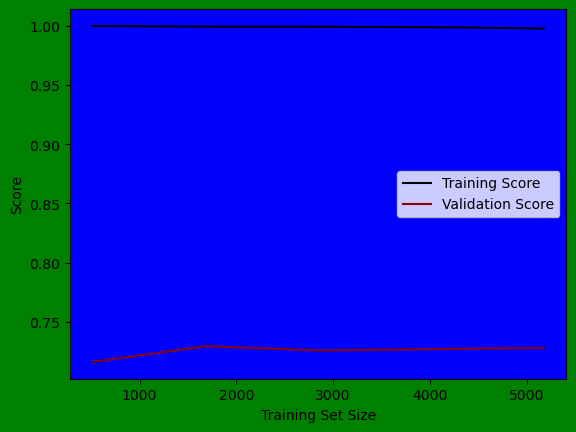

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('green')
ax.set_facecolor('blue')
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score", color = 'black')
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation Score", color = 'darkred')
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.show()

# Feature Importance

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tf, y_train)



LogisticRegression()

In [ ]:
feature_importance = pd.DataFrame(model.coef_[0],
                                 index = cols_input,
                                 columns = ['importance']).sort_values(by = 'importance',
                                                                       ascending= False)

In [ ]:
feature_importance

,importance
cons.price.idx,0.948431
euribor3m,0.487498
month_aug,0.215945
nr.employed,0.197676
month_mar,0.182496
...,...
month_jun,-0.129599
contact_telephone,-0.132556
month_may,-0.179712
pdays,-0.226318


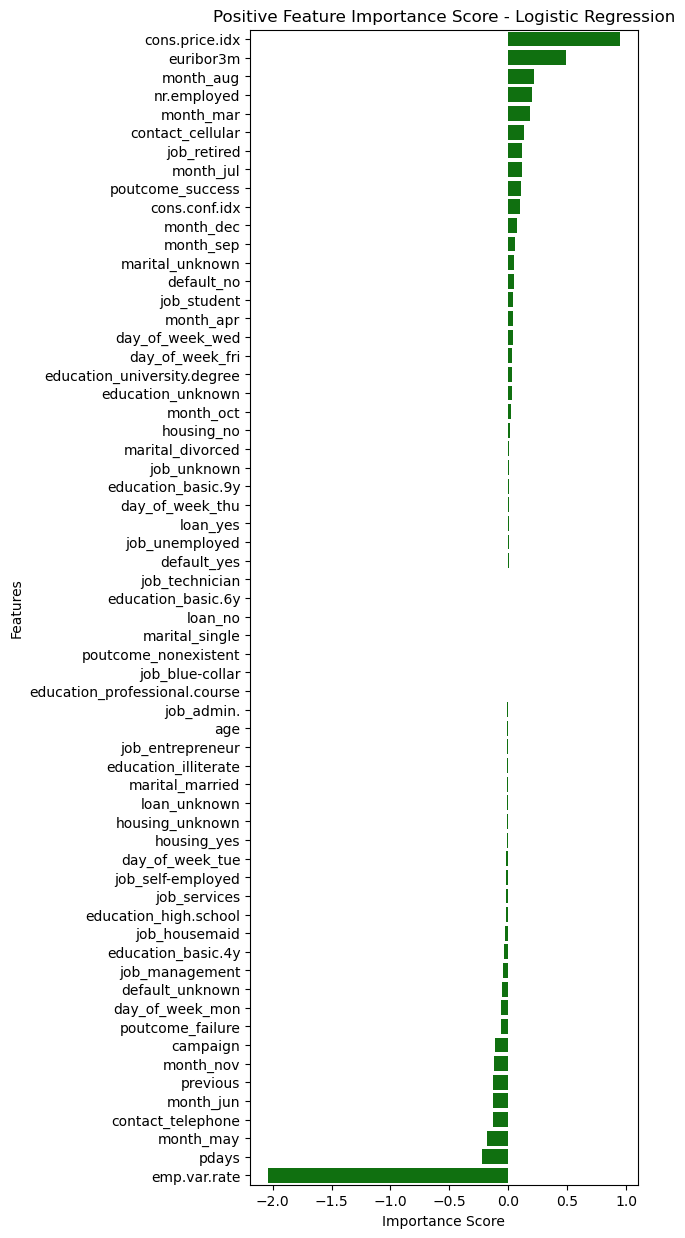

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(x='importance', y= feature_importance.index, data = feature_importance, color = 'green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.show()

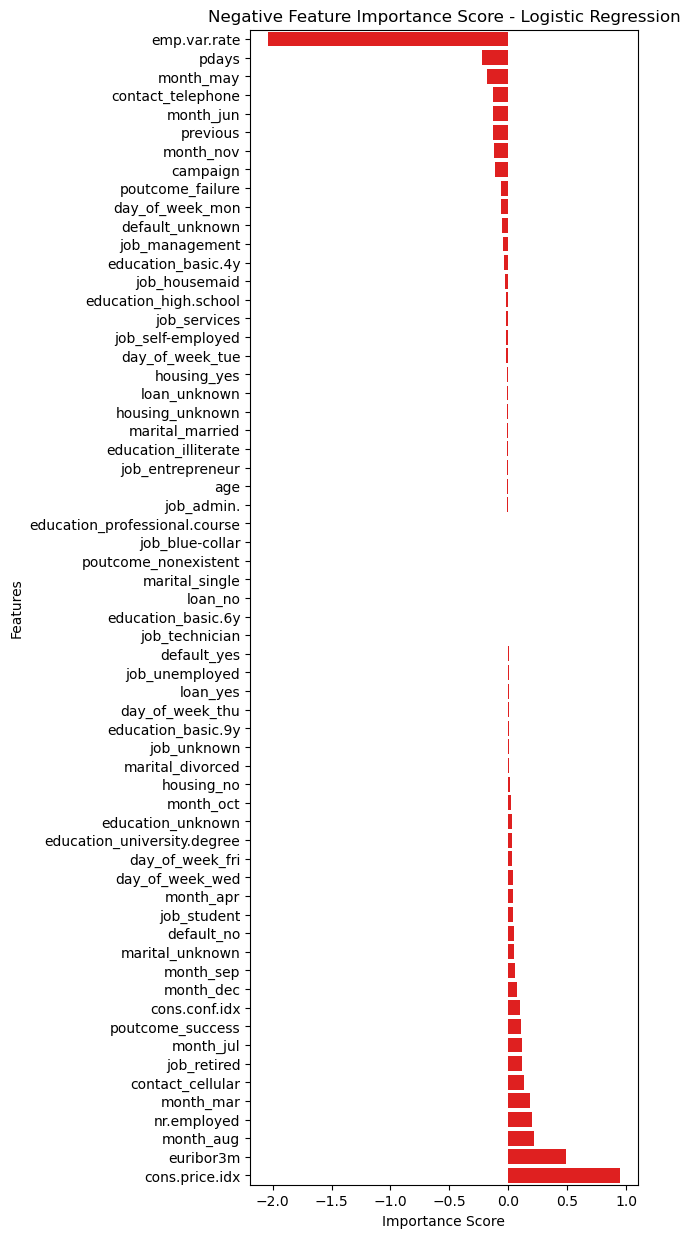

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_tf, y_train)
feature_importance = pd.DataFrame(model.coef_[0],
                                 index = cols_input,
                                 columns = ['importance']).sort_values(by = 'importance',
                                                                       ascending= True)
plt.figure(figsize=(5,15))
sns.barplot(x='importance', y= feature_importance.index, data = feature_importance, color = 'red')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.show()

In [ ]:
# RF

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [ ]:
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importance.head()

,importance
nr.employed,0.182434
euribor3m,0.171206
emp.var.rate,0.161003
cons.conf.idx,0.072705
pdays,0.057172


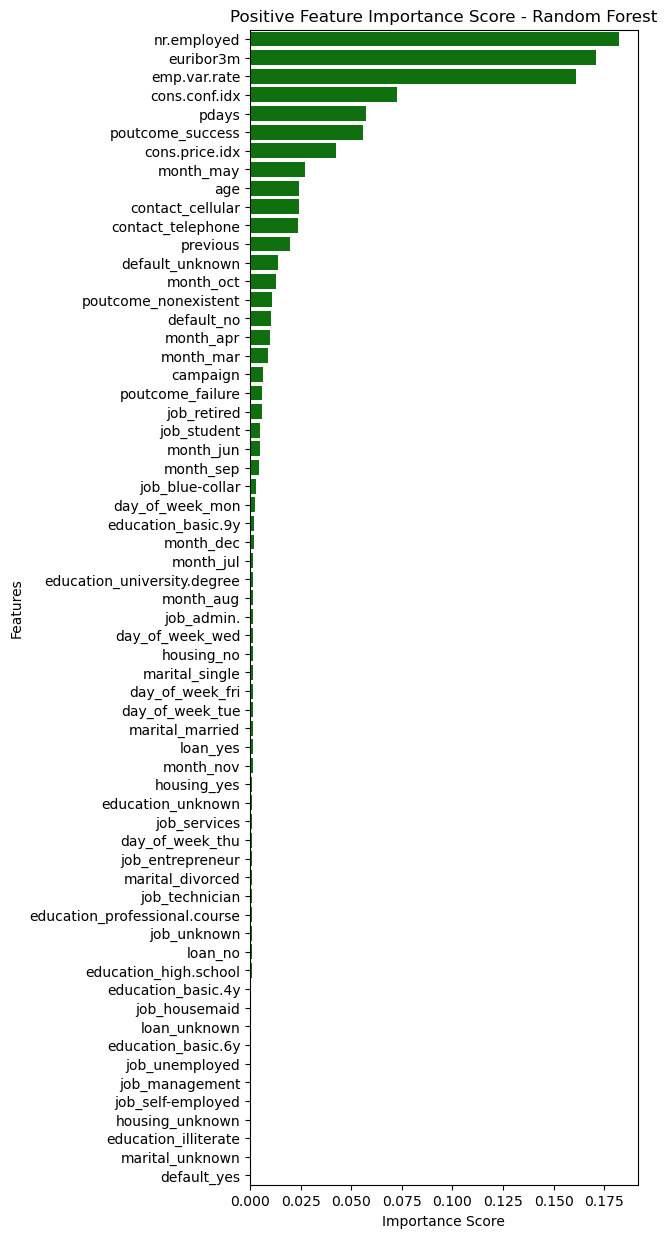

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(x='importance', y= feature_importance.index, data = feature_importance, color = 'green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Positive Feature Importance Score - Random Forest')
plt.show()

In [ ]:
# GB

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(x_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [ ]:
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importance.head()

,importance
nr.employed,0.182434
euribor3m,0.171206
emp.var.rate,0.161003
cons.conf.idx,0.072705
pdays,0.057172


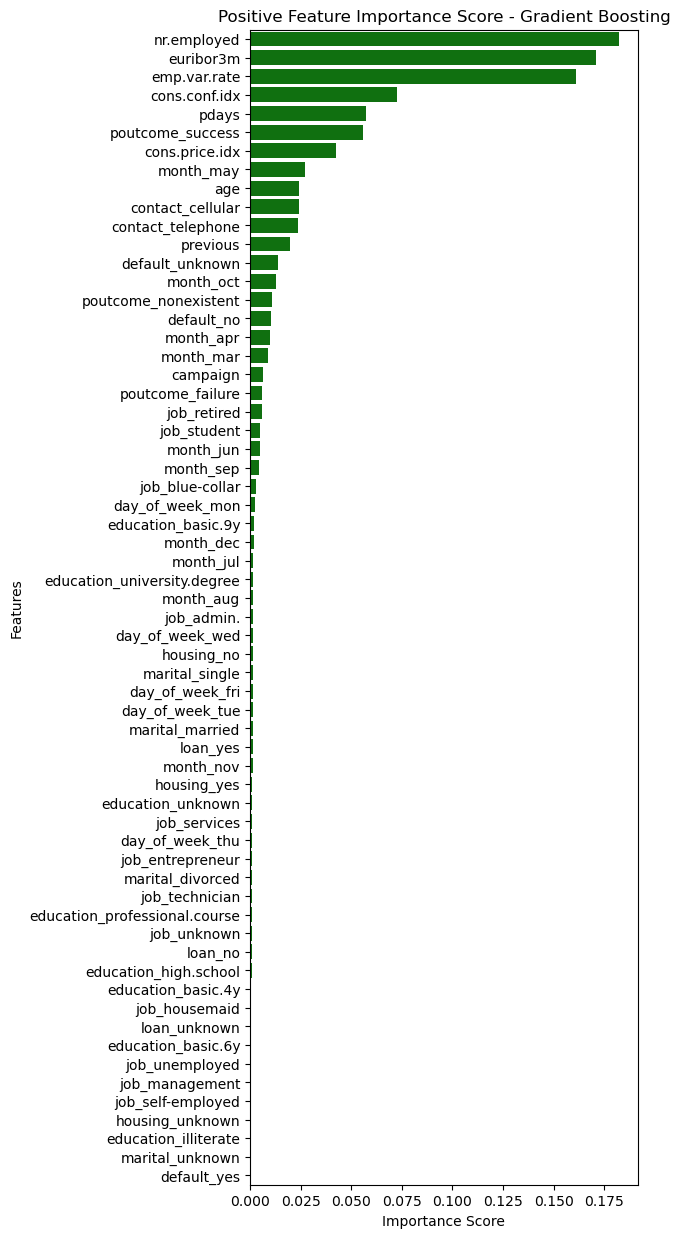

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(x='importance', y= feature_importance.index, data = feature_importance, color = 'green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Positive Feature Importance Score - Gradient Boosting')
plt.show()

In [ ]:
# DT

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(x_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
feature_importance = pd.DataFrame(tree.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importance.head()

,importance
nr.employed,0.475464
cons.conf.idx,0.141336
euribor3m,0.055600
age,0.055271
campaign,0.035228


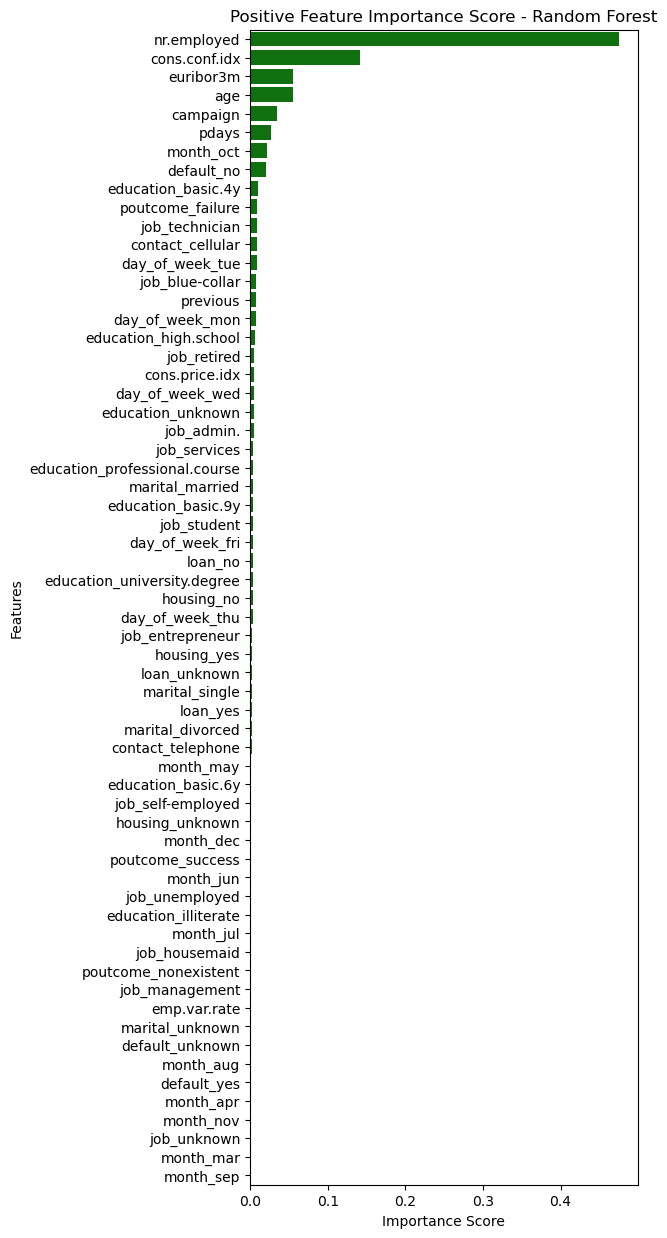

In [ ]:
plt.figure(figsize=(5,15))
sns.barplot(x='importance', y= feature_importance.index, data = feature_importance, color = 'green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Positive Feature Importance Score - Random Forest')
plt.show()

# Hyperparameter Tunning

In [ ]:

max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]


    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(x_train_tf, y_train)

    y_train_preds = rf.predict_proba(x_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(x_valid_tf)[:,1]


    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)


    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

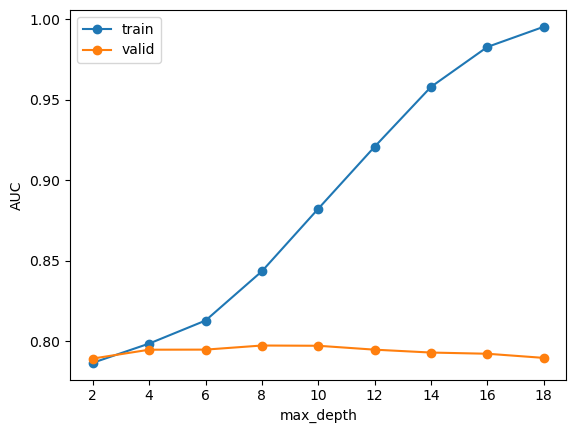

In [ ]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = range(200,1000,200)


max_features = ['auto','sqrt']


max_depth = range(2,20,2)


min_samples_split = range(2,10,2)

criterion = ['gini','entropy']


random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [ ]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [ ]:

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 20, cv = 2,
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [ ]:
import time
t1 = time.time()
rf_random.fit(x_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-pack

89.1838493347168


In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [ ]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(x_train_tf, y_train)

y_train_preds = rf.predict_proba(x_train_tf)[:,1]
y_valid_preds = rf.predict_proba(x_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(x_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(x_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.813
Validation AUC:0.795
Optimized Random Forest
Training AUC:0.843
Validation AUC:0.797


In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log_loss',alpha = 0.1,random_state = 42)
sgdc.fit(x_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=42)

In [ ]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(x_train_tf, y_train)
t2 = time.time()
print(t2-t1)

1.1124770641326904


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LENOVO\anaconda3\Lib\site-pack

In [ ]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 400, 'alpha': 0.01}

In [ ]:
y_train_preds = sgdc.predict_proba(x_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(x_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(x_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(x_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.792
Validation AUC:0.800
Optimized sgdc
Training AUC:0.794
Validation AUC:0.793


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(x_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [ ]:

n_estimators = range(50,200,50)


max_depth = range(1,5,1)


learning_rate = [0.001,0.01,0.1]



random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}


gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(x_train_tf, y_train)
t2 = time.time()
print(t2-t1)

38.27942371368408


In [ ]:
gbc_random.best_params_

{'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.1}

In [ ]:
y_train_preds = gbc.predict_proba(x_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(x_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(x_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(x_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.900
Validation AUC:0.777
Optimized gbc
Training AUC:0.817
Validation AUC:0.798


In [ ]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })
df_results

,classifier,data_set,auc
0,SGD,baseline,0.799965
1,SGD,optimized,0.793466
2,RF,baseline,0.794707
3,RF,optimized,0.796645
4,GB,baseline,0.776718
5,GB,optimized,0.798411


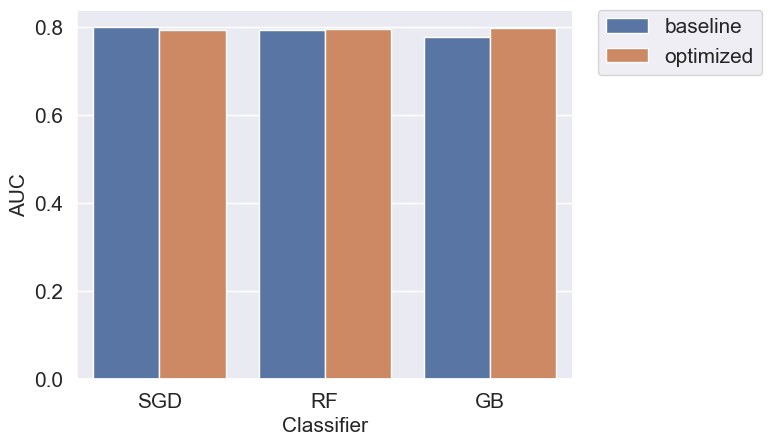

In [ ]:
sns.set(style="darkgrid")
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# model evaluation

In [ ]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)
pickle.dump(cols_input, open('cols_input.sav', 'wb'))
df_mean = df_train_all[cols_input].mean(axis = 0)
df_mean.to_csv('df_mean.csv',index=True)
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [ ]:
import pickle

best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['output_label'].values
y_valid = df_valid['output_label'].values
y_test = df_test['output_label'].values

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]



In [ ]:
thresh = .5

In [ ]:

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)


Training:
AUC:0.817
accuracy:0.754
recall:0.644
precision:0.826
specificity:0.864
prevalence:0.500
f1:0.724
 


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Test:
AUC:0.795
accuracy:0.741
recall:0.620
precision:0.818
specificity:0.862
prevalence:0.500
f1:0.705
 


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)


Validation:
AUC:0.798
accuracy:0.755
recall:0.645
precision:0.826
specificity:0.864
prevalence:0.500
f1:0.724
 


TypeError: cannot unpack non-iterable NoneType object

# ROC Curve

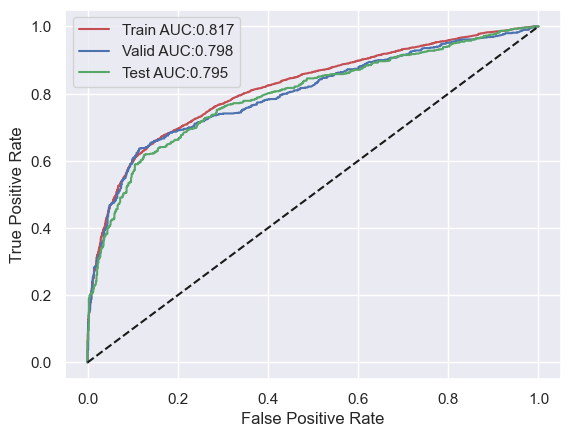

In [ ]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion:
Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 79.5%.

A precision of 0.82 divided by a prevalence of 0.50 gives us 1.6, which means that the machine learning model helps us 1.6 times better than randomly guessing. The model was able to catch 62% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and euribor3m (3 month indicator for paying off loans) as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.